In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import math
import librosa
import pandas as pd

In [ ]:
data = pd.read_csv("/content/data.csv")
data = data.drop(columns=["Unnamed: 0"])
data 

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0,shuffle=True)


In [ ]:
X

In [ ]:
# SVC GridSearchCV
parameters = {'kernel' : ('linear','poly', 'rbf'), 'C':np.arange(20,80,5)}
svc = svm.SVC()
clf_svm = GridSearchCV(svc, parameters)
clf_svm.fit(X_train,y_train)
print(clf_svm.best_params_)

{'C': 25, 'kernel': 'rbf'}


Training score = 0.9841269841269841
Testing score  = 0.8412698412698413


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


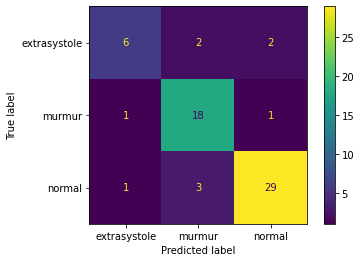

In [ ]:
# SVC Classifier
svc = svm.SVC(kernel ='rbf',C=25)
svc.fit(X_train,y_train)
print(f"Training score = {svc.score(X_train,y_train)}")
print(f"Testing score  = {svc.score(X_test,y_test)}")
plot_confusion_matrix(svc, X_test, y_test) 
plt.show()

In [ ]:
# RFC GridSearchCV
rfc = RandomForestClassifier()
forest_params = [{'n_estimators':list(range(600, 800)),'max_depth': list(range(4, 15))}]
clf_rfc = GridSearchCV(rfc, forest_params, cv = 10, scoring='f1_macro')
clf_rfc.fit(X_train, y_train)
print(clf_rfc.best_params_)


F1 score = 0.5505605505605505


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


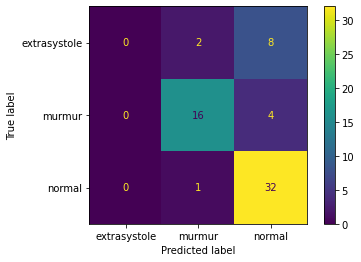

In [ ]:
# RFC Classifier
rfc = RandomForestClassifier(n_estimators=500, max_depth=4, random_state=0)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(f"F1 score = {f1_score(y_test,predictions,average = 'macro')}")
# print(f"Testing score  = {rfc.score(X_test,y_test)}")
plot_confusion_matrix(rfc, X_test, y_test) 
plt.show()
